In [1]:
# 📘 Efficient Electricity Use in Irrigation – Data Exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Western_UP_5_Districts_Irrigation_Data.csv", parse_dates=["date"])

# Preview the data
df.head()


,district,date,temperature_C,precip_mm,wind_m_s,solar_rad_MJ_m2,crop,soil_moisture,irrigated,electricity_kWh
0,Meerut,2015-01-01,16.6,1,1.07,17.38,Wheat,34.1,0,0.0
1,Meerut,2015-01-02,14.9,1,2.14,15.96,Wheat,30.8,0,0.0
2,Meerut,2015-01-03,14.1,0,2.33,19.37,Wheat,21.1,1,4.5
3,Meerut,2015-01-04,17.3,2,1.16,23.18,Wheat,34.0,0,0.0
4,Meerut,2015-01-05,19.9,2,1.51,22.66,Wheat,33.8,0,0.0


C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anmol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


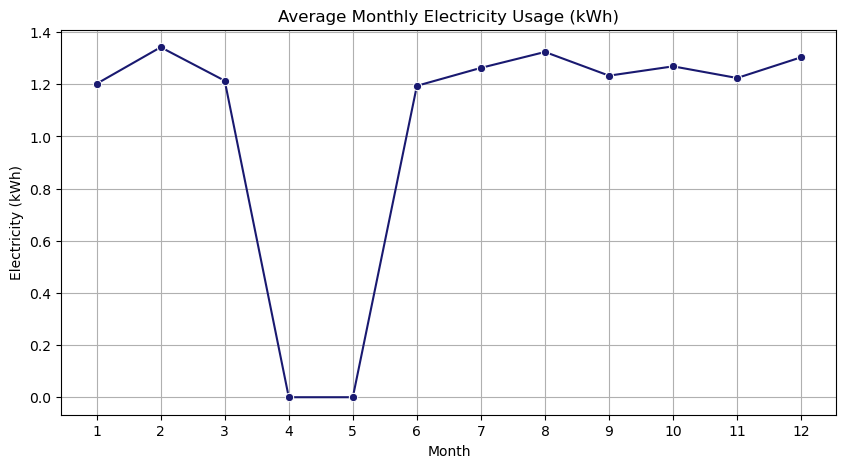

In [2]:
# Extract year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Average electricity usage by month
monthly_usage = df.groupby("month")["electricity_kWh"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values, marker="o", color='midnightblue')
plt.title("Average Monthly Electricity Usage (kWh)")
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


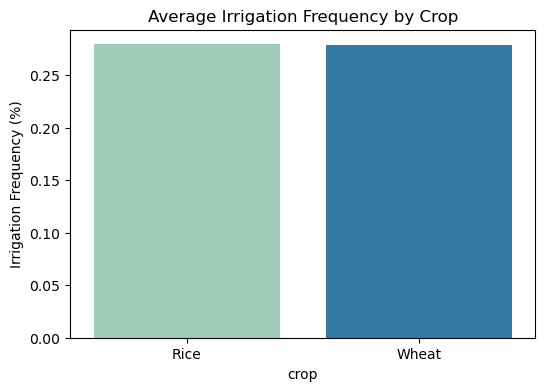

In [3]:
crop_irrigation = df.groupby("crop")["irrigated"].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=crop_irrigation.index, y=crop_irrigation.values, palette="YlGnBu")
plt.title("Average Irrigation Frequency by Crop")
plt.ylabel("Irrigation Frequency (%)")
plt.show()


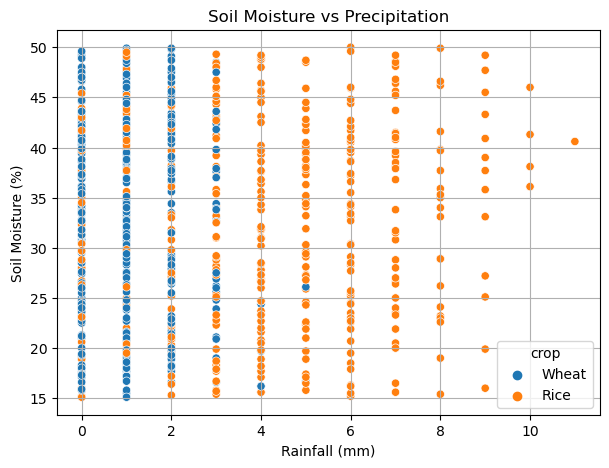

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df.sample(1000), x="precip_mm", y="soil_moisture", hue="crop")
plt.title("Soil Moisture vs Precipitation")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Soil Moisture (%)")
plt.grid(True)
plt.show()


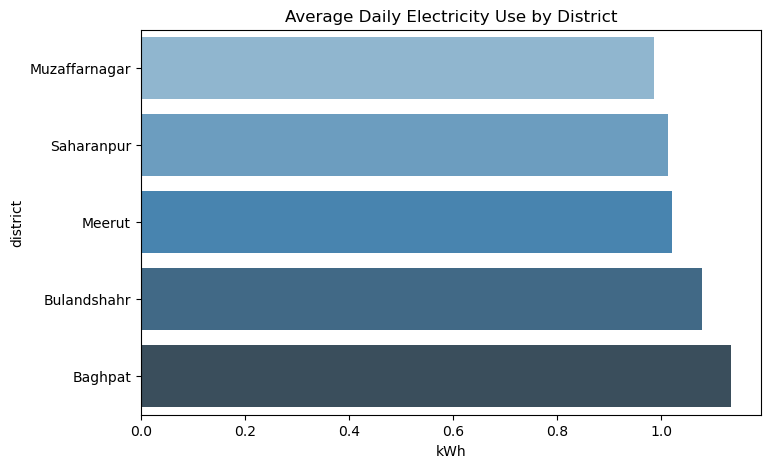

In [5]:
district_usage = df.groupby("district")["electricity_kWh"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=district_usage.values, y=district_usage.index, palette="Blues_d")
plt.title("Average Daily Electricity Use by District")
plt.xlabel("kWh")
plt.show()
